In [1]:
#importamos librería
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,MinMaxScaler, OrdinalEncoder
import sqlite3 as sql
import xgboost as xgb

# transformers
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OrdinalEncoder, OneHotEncoder
 
# pipelines
from sklearn.pipeline import Pipeline, FunctionTransformer
from sklearn.compose import ColumnTransformer
 
from sklearn.metrics import accuracy_score
from sklearn import set_config

In [2]:
# Configurar la salida de las transformaciones de scikit-learn a formato pandas
set_config(transform_output = "pandas")

In [3]:
# Configurar la opción de pandas para mostrar un máximo de 100 columnas en la salida
pd.set_option("display.max_columns", 100)

In [4]:
# Cargar el DataFrame df_easy desde un archivo pickle
df_easy = pd.read_pickle("data/df_easy.pkl")

# EDA

In [5]:
# Obtener la forma (número de filas y columnas) del DataFrame df_easy
df_easy.shape

(5956511, 27)

In [6]:
# Mostrar información general del DataFrame df_easy, incluyendo el número de entradas, 
# el número de columnas, el tipo de datos de cada columna y la cantidad de valores no nulos.
df_easy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5956511 entries, 0 to 5962923
Data columns (total 27 columns):
 #   Column              Dtype         
---  ------              -----         
 0   pk_cid              int32         
 1   pk_partition        datetime64[ns]
 2   entry_date          datetime64[ns]
 3   entry_channel       object        
 4   active_customer     int16         
 5   segment             object        
 6   short_term_deposit  int16         
 7   loans               int16         
 8   mortgage            int16         
 9   funds               int16         
 10  securities          int16         
 11  long_term_deposit   int16         
 12  em_account_pp       int16         
 13  credit_card         int16         
 14  payroll             float64       
 15  pension_plan        float64       
 16  payroll_account     int16         
 17  emc_account         int16         
 18  debit_card          int16         
 19  em_account_p        int16         
 20  em_acou

In [7]:
# Filtrar el DataFrame para obtener los registros donde la edad es menor a 18 años, se valorará si los menores realmente son clientes
# y contar la frecuencia de los valores en la columna 'salary', incluyendo los valores NaN
df_easy[df_easy['age'] < 18]['salary'].value_counts(dropna=False, normalize=False)

salary
NaN          6846
108644.82     102
273387.54      68
53210.94       56
316120.23      51
             ... 
58283.97        3
97220.64        1
142045.50       1
83821.35        1
39557.28        1
Name: count, Length: 1492, dtype: int64

## 1. Comprobacion de duplicados

In [8]:
# Filtrar el DataFrame para obtener los registros duplicados, incluyendo el primer registro de cada duplicado
df_easy[df_easy.duplicated(keep=False)]

,pk_cid,pk_partition,entry_date,entry_channel,active_customer,segment,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,em_account_pp,credit_card,payroll,pension_plan,payroll_account,emc_account,debit_card,em_account_p,em_acount,country_id,region_code,gender,age,deceased,salary


## 2. Gestion de nulos

In [9]:
# Mostrar las primeras filas del DataFrame df_easy
df_easy.head()

,pk_cid,pk_partition,entry_date,entry_channel,active_customer,segment,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,em_account_pp,credit_card,payroll,pension_plan,payroll_account,emc_account,debit_card,em_account_p,em_acount,country_id,region_code,gender,age,deceased,salary
0,1375586,2018-01-28,2018-01-12,KHL,1,02 - PARTICULARES,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,1,ES,29.0,H,35,N,87218.10
1,1050611,2018-01-28,2015-08-10,KHE,0,03 - UNIVERSITARIO,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,1,ES,13.0,V,23,N,35548.74
2,1050612,2018-01-28,2015-08-10,KHE,0,03 - UNIVERSITARIO,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,1,ES,13.0,V,23,N,122179.11
3,1050613,2018-01-28,2015-08-10,KHD,0,03 - UNIVERSITARIO,1,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,0,ES,50.0,H,22,N,119775.54
4,1050614,2018-01-28,2015-08-10,KHE,1,03 - UNIVERSITARIO,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,1,ES,50.0,V,23,N,NaN


In [10]:
# Filtrar el DataFrame para obtener los registros donde el 'pk_cid' es igual a 1375586
df_easy[df_easy['pk_cid']==1375586]

,pk_cid,pk_partition,entry_date,entry_channel,active_customer,segment,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,em_account_pp,credit_card,payroll,pension_plan,payroll_account,emc_account,debit_card,em_account_p,em_acount,country_id,region_code,gender,age,deceased,salary
0,1375586,2018-01-28,2018-01-12,KHL,1,02 - PARTICULARES,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,1,ES,29.0,H,35,N,87218.1
346322,1375586,2018-02-28,2018-01-12,KHL,1,02 - PARTICULARES,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,1,ES,29.0,H,35,N,87218.1
592407,1375586,2018-03-28,2018-01-12,KHL,1,02 - PARTICULARES,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,1,ES,29.0,H,35,N,87218.1
831104,1375586,2018-04-28,2018-01-12,KHL,1,02 - PARTICULARES,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,1,ES,29.0,H,35,N,87218.1
1108457,1375586,2018-05-28,2018-01-12,KHL,1,02 - PARTICULARES,0,0,0,0,0,0,0,0,0.0,0.0,0,0,1,0,1,ES,29.0,H,35,N,87218.1
1357280,1375586,2018-06-28,2018-01-12,KHL,1,02 - PARTICULARES,0,0,0,0,0,0,0,0,0.0,0.0,0,0,1,0,1,ES,29.0,H,35,N,87218.1
1791360,1375586,2018-07-28,2018-01-12,KHL,1,02 - PARTICULARES,0,0,0,0,0,0,0,0,0.0,0.0,0,0,1,0,1,ES,29.0,H,35,N,87218.1
1988936,1375586,2018-08-28,2018-01-12,KHL,0,02 - PARTICULARES,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,1,ES,29.0,H,36,N,87218.1
2487565,1375586,2018-09-28,2018-01-12,KHL,0,02 - PARTICULARES,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,1,ES,29.0,H,36,N,87218.1
2753984,1375586,2018-10-28,2018-01-12,KHL,0,02 - PARTICULARES,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,1,ES,29.0,H,36,N,87218.1


In [11]:
# Agrupar por 'pk_cid' y aplicar una función lambda para verificar si todas las filas tienen 'active_customer' igual a 1
active_customers = df_easy.groupby('pk_cid')['active_customer'].apply(lambda x: (x == 1).all())

# Filtrar los clientes donde todas las filas tienen 'active_customer' igual a 1
active_customer_ids = active_customers[active_customers].index

# Obtener el DataFrame para estos clientes
final_result_df = df_easy[df_easy['pk_cid'].isin(active_customer_ids)]

# Mostrar el DataFrame resultante
final_result_df


,pk_cid,pk_partition,entry_date,entry_channel,active_customer,segment,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,em_account_pp,credit_card,payroll,pension_plan,payroll_account,emc_account,debit_card,em_account_p,em_acount,country_id,region_code,gender,age,deceased,salary
4,1050614,2018-01-28,2015-08-10,KHE,1,03 - UNIVERSITARIO,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,1,ES,50.0,V,23,N,NaN
7,1050617,2018-01-28,2015-08-10,KHE,1,03 - UNIVERSITARIO,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,1,ES,50.0,H,23,N,113316.66
12,1050623,2018-01-28,2015-08-10,KHE,1,03 - UNIVERSITARIO,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,1,ES,49.0,H,23,N,113538.81
15,1050626,2018-01-28,2015-08-10,KHE,1,03 - UNIVERSITARIO,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,1,ES,8.0,V,23,N,NaN
16,1050610,2018-01-28,2015-08-10,KHE,1,03 - UNIVERSITARIO,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,1,ES,37.0,V,24,N,68318.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5962894,1166759,2019-05-28,2016-08-14,KHE,1,03 - UNIVERSITARIO,0,0,0,0,0,0,0,0,0.0,0.0,1,0,0,0,0,ES,46.0,H,22,N,161098.71
5962895,1166761,2019-05-28,2016-08-14,KHE,1,03 - UNIVERSITARIO,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,1,ES,50.0,H,23,N,NaN
5962906,1166778,2019-05-28,2016-08-14,KHE,1,03 - UNIVERSITARIO,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,1,ES,50.0,V,23,N,NaN
5962909,1166775,2019-05-28,2016-08-16,KHE,1,03 - UNIVERSITARIO,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,1,ES,50.0,V,23,N,77784.78


In [12]:
final_result_df

,pk_cid,pk_partition,entry_date,entry_channel,active_customer,segment,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,em_account_pp,credit_card,payroll,pension_plan,payroll_account,emc_account,debit_card,em_account_p,em_acount,country_id,region_code,gender,age,deceased,salary
4,1050614,2018-01-28,2015-08-10,KHE,1,03 - UNIVERSITARIO,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,1,ES,50.0,V,23,N,NaN
7,1050617,2018-01-28,2015-08-10,KHE,1,03 - UNIVERSITARIO,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,1,ES,50.0,H,23,N,113316.66
12,1050623,2018-01-28,2015-08-10,KHE,1,03 - UNIVERSITARIO,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,1,ES,49.0,H,23,N,113538.81
15,1050626,2018-01-28,2015-08-10,KHE,1,03 - UNIVERSITARIO,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,1,ES,8.0,V,23,N,NaN
16,1050610,2018-01-28,2015-08-10,KHE,1,03 - UNIVERSITARIO,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,1,ES,37.0,V,24,N,68318.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5962894,1166759,2019-05-28,2016-08-14,KHE,1,03 - UNIVERSITARIO,0,0,0,0,0,0,0,0,0.0,0.0,1,0,0,0,0,ES,46.0,H,22,N,161098.71
5962895,1166761,2019-05-28,2016-08-14,KHE,1,03 - UNIVERSITARIO,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,1,ES,50.0,H,23,N,NaN
5962906,1166778,2019-05-28,2016-08-14,KHE,1,03 - UNIVERSITARIO,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,1,ES,50.0,V,23,N,NaN
5962909,1166775,2019-05-28,2016-08-16,KHE,1,03 - UNIVERSITARIO,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,1,ES,50.0,V,23,N,77784.78


In [13]:
# Contar el número de clientes únicos en el DataFrame final_result_df
num_unique_customers = final_result_df['pk_cid'].nunique()

In [14]:
print("Numero de consumidores unicos activos:", num_unique_customers)

Numero de consumidores unicos activos: 138887


In [15]:
# Contar el número de valores nulos en cada columna del DataFrame df_easy
df_easy.isnull().sum()

pk_cid                      0
pk_partition                0
entry_date                  0
entry_channel          132083
active_customer             0
segment                133009
short_term_deposit          0
loans                       0
mortgage                    0
funds                       0
securities                  0
long_term_deposit           0
em_account_pp               0
credit_card                 0
payroll                    61
pension_plan               61
payroll_account             0
emc_account                 0
debit_card                  0
em_account_p                0
em_acount                   0
country_id                  0
region_code              2264
gender                     25
age                         0
deceased                    0
salary                1507109
dtype: int64

In [16]:
# Contar la frecuencia de los valores en la columna 'entry_channel', incluyendo los valores NaN
df_easy['entry_channel'].value_counts(dropna=False)

entry_channel
KHE    3113947
KFC     889944
KHQ     590280
KAT     415870
KHK     230182
        ...   
KES         11
KEJ          8
KHS          5
KDA          2
KFP          2
Name: count, Length: 68, dtype: int64

In [17]:
# Contar la frecuencia de los valores en la columna 'segmento', incluyendo los valores NaN
df_easy['segment'].value_counts(dropna=False)

segment
03 - UNIVERSITARIO    3899024
02 - PARTICULARES     1826620
NaN                    133009
01 - TOP                97858
Name: count, dtype: int64

In [18]:
# Rellenar los valores nulos en la columna 'segment' con el valor "Desconocido"
df_easy["segment"].fillna("Desconocido", inplace=True)

C:\Users\Roger\AppData\Local\Temp\ipykernel_26708\1845896580.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_easy["segment"].fillna("Desconocido", inplace=True)


In [19]:
# Definir un ColumnTransformer para aplicar transformaciones a columnas específicas
ct_imput = ColumnTransformer(
  transformers=[
    # Aplicar SimpleImputer con la estrategia "most_frequent" a las columnas especificadas
    ("impute_most_frequent", SimpleImputer(strategy="most_frequent"), ["entry_channel", "payroll", "pension_plan", "gender"])
  ],
  # Mantener el resto de las columnas sin cambios
  remainder="passthrough"
  # Si se desea eliminar el resto de las columnas, se puede usar "drop"
  # remainder="drop"
)

In [20]:
# Guardamos el tipo de dato en una variable para luego restablecerlo
original_dtypes = df_easy[["entry_channel", "payroll", "pension_plan", "gender"]].dtypes

In [21]:
# Filtrar el DataFrame para obtener los registros donde el segmento es "Desconocido" y la fecha de partición es mayo de 2018,
# y contar la frecuencia de los valores en todas las columnas.
df_easy[(df_easy['segment'] == 'Desconocido') & ((df_easy['pk_partition'].dt.year == 2018) & (df_easy['pk_partition'].dt.month == 5))].value_counts()

Series([], Name: count, dtype: int64)

In [22]:
# Filtrar el DataFrame para obtener los registros donde la fecha de partición es mayo de 2019,
# y contar la frecuencia de los valores en la columna 'segment'.
df_easy[(df_easy['pk_partition'].dt.year == 2019) & (df_easy['pk_partition'].dt.month == 5)]['segment'].value_counts()

segment
03 - UNIVERSITARIO    284000
02 - PARTICULARES     145889
01 - TOP                7150
Desconocido             4615
Name: count, dtype: int64

In [23]:
# Mostrar información general del DataFrame df_easy, incluyendo el número de entradas, 
# el número de columnas, el tipo de datos de cada columna y la cantidad de valores no nulos.
df_easy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5956511 entries, 0 to 5962923
Data columns (total 27 columns):
 #   Column              Dtype         
---  ------              -----         
 0   pk_cid              int32         
 1   pk_partition        datetime64[ns]
 2   entry_date          datetime64[ns]
 3   entry_channel       object        
 4   active_customer     int16         
 5   segment             object        
 6   short_term_deposit  int16         
 7   loans               int16         
 8   mortgage            int16         
 9   funds               int16         
 10  securities          int16         
 11  long_term_deposit   int16         
 12  em_account_pp       int16         
 13  credit_card         int16         
 14  payroll             float64       
 15  pension_plan        float64       
 16  payroll_account     int16         
 17  emc_account         int16         
 18  debit_card          int16         
 19  em_account_p        int16         
 20  em_acou

In [24]:
# Aplicar las transformaciones definidas en ct_imput al DataFrame df_easy
df_easy_i = ct_imput.fit_transform(df_easy)
df_easy_i

,impute_most_frequent__entry_channel,impute_most_frequent__payroll,impute_most_frequent__pension_plan,impute_most_frequent__gender,remainder__pk_cid,remainder__pk_partition,remainder__entry_date,remainder__active_customer,remainder__segment,remainder__short_term_deposit,remainder__loans,remainder__mortgage,remainder__funds,remainder__securities,remainder__long_term_deposit,remainder__em_account_pp,remainder__credit_card,remainder__payroll_account,remainder__emc_account,remainder__debit_card,remainder__em_account_p,remainder__em_acount,remainder__country_id,remainder__region_code,remainder__age,remainder__deceased,remainder__salary
0,KHL,0.0,0.0,H,1375586,2018-01-28,2018-01-12,1,02 - PARTICULARES,0,0,0,0,0,0,0,0,0,0,0,0,1,ES,29.0,35,N,87218.10
1,KHE,0.0,0.0,V,1050611,2018-01-28,2015-08-10,0,03 - UNIVERSITARIO,0,0,0,0,0,0,0,0,0,0,0,0,1,ES,13.0,23,N,35548.74
2,KHE,0.0,0.0,V,1050612,2018-01-28,2015-08-10,0,03 - UNIVERSITARIO,0,0,0,0,0,0,0,0,0,0,0,0,1,ES,13.0,23,N,122179.11
3,KHD,0.0,0.0,H,1050613,2018-01-28,2015-08-10,0,03 - UNIVERSITARIO,1,0,0,0,0,0,0,0,0,0,0,0,0,ES,50.0,22,N,119775.54
4,KHE,0.0,0.0,V,1050614,2018-01-28,2015-08-10,1,03 - UNIVERSITARIO,0,0,0,0,0,0,0,0,0,0,0,0,1,ES,50.0,23,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5962919,KHE,0.0,0.0,V,1166765,2019-05-28,2016-08-14,0,03 - UNIVERSITARIO,0,0,0,0,0,0,0,0,0,0,0,0,1,ES,50.0,22,N,43912.17
5962920,KHE,0.0,0.0,V,1166764,2019-05-28,2016-08-14,0,03 - UNIVERSITARIO,0,0,0,0,0,0,0,0,0,0,0,0,1,ES,26.0,23,N,23334.99
5962921,KHE,0.0,0.0,H,1166763,2019-05-28,2016-08-14,1,02 - PARTICULARES,0,0,0,0,0,0,0,0,0,0,0,0,1,ES,50.0,47,N,NaN
5962922,KHE,0.0,0.0,H,1166789,2019-05-28,2016-08-14,0,03 - UNIVERSITARIO,0,0,0,0,0,0,0,0,0,0,0,0,1,ES,50.0,22,N,199592.82


In [25]:
# Contar el número de valores únicos en la columna 'remainder__region_code' del DataFrame df_easy_i
len(df_easy_i['remainder__region_code'].value_counts())

52

In [26]:
# Filtrar el DataFrame para obtener los registros donde el 'country_id' es 'ES' (España) 
# y el 'region_code' es nulo (NaN)
df_easy_i[(df_easy_i['remainder__country_id'] == 'ES') & (df_easy_i['remainder__region_code'].isnull())]

,impute_most_frequent__entry_channel,impute_most_frequent__payroll,impute_most_frequent__pension_plan,impute_most_frequent__gender,remainder__pk_cid,remainder__pk_partition,remainder__entry_date,remainder__active_customer,remainder__segment,remainder__short_term_deposit,remainder__loans,remainder__mortgage,remainder__funds,remainder__securities,remainder__long_term_deposit,remainder__em_account_pp,remainder__credit_card,remainder__payroll_account,remainder__emc_account,remainder__debit_card,remainder__em_account_p,remainder__em_acount,remainder__country_id,remainder__region_code,remainder__age,remainder__deceased,remainder__salary
215020,KFC,1.0,1.0,V,1234433,2018-01-28,2016-12-27,1,02 - PARTICULARES,0,0,0,0,0,0,0,1,0,0,1,0,0,ES,NaN,45,N,NaN
276408,KFC,1.0,1.0,V,1234433,2018-02-28,2016-12-27,1,02 - PARTICULARES,0,0,0,0,0,0,0,1,1,0,1,0,0,ES,NaN,45,N,NaN
517930,KFC,1.0,1.0,V,1234433,2018-03-28,2016-12-27,1,02 - PARTICULARES,0,0,0,0,0,0,0,1,0,0,1,0,0,ES,NaN,45,N,NaN
760234,KFC,1.0,1.0,V,1234433,2018-04-28,2016-12-27,1,02 - PARTICULARES,0,0,0,0,0,0,0,1,0,0,1,0,0,ES,NaN,45,N,NaN
1190279,KFC,1.0,1.0,V,1234433,2018-05-28,2016-12-27,1,02 - PARTICULARES,0,0,0,0,0,0,0,1,0,0,1,0,0,ES,NaN,45,N,NaN
1442145,KFC,1.0,1.0,V,1234433,2018-06-28,2016-12-27,1,02 - PARTICULARES,0,0,0,0,0,0,0,1,0,0,1,0,0,ES,NaN,45,N,NaN
1744982,KFC,1.0,1.0,V,1234433,2018-07-28,2016-12-27,1,02 - PARTICULARES,0,0,0,0,0,0,0,1,0,0,1,0,0,ES,NaN,45,N,NaN
2113491,KFC,1.0,1.0,V,1234433,2018-08-28,2016-12-27,1,02 - PARTICULARES,0,0,0,0,0,0,0,1,0,0,1,0,0,ES,NaN,45,N,NaN
2256273,KFC,0.0,0.0,V,1234433,2018-09-28,2016-12-27,1,02 - PARTICULARES,0,0,0,0,0,0,0,1,0,0,1,0,0,ES,NaN,45,N,NaN
2864559,KFC,0.0,0.0,V,1234433,2018-10-28,2016-12-27,1,02 - PARTICULARES,0,0,0,0,0,0,0,1,0,0,0,0,0,ES,NaN,45,N,NaN


In [27]:
# Agrupar el DataFrame df_easy_i por 'remainder__country_id' y aplicar la función 'list' a la columna 'remainder__region_code'
# Luego, restablecer el índice del DataFrame resultante
df_easy_i.groupby('remainder__country_id')['remainder__region_code'].apply(list).reset_index()

,remainder__country_id,remainder__region_code
0,AR,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ..."
1,AT,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ..."
2,BE,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ..."
3,BR,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ..."
4,CA,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ..."
5,CH,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ..."
6,CI,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ..."
7,CL,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ..."
8,CM,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ..."
9,CN,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ..."


In [28]:
# Filtrar el DataFrame para obtener los registros donde el 'country_id' es 'ES' (España)
# y contar el número de valores nulos en la columna 'region_code'
df_easy_i[df_easy_i['remainder__country_id'] == 'ES']['remainder__region_code'].isnull().sum()

12

In [29]:
# Contar el número de valores únicos en la columna 'remainder__country_id' del DataFrame df_easy_i
len(df_easy_i['remainder__country_id'].value_counts())

41

In [30]:
# Se eliminan esos registros que son nulos en region_code, esto nos dropeará los paises que no son españa ya que el resto de paises no tienen region_code
# Eliminar los paises que no son España favorecerá al modelo 
# Al tener pocos registros de paises que no son España el modelo no tendria suficiente información como para hacer predicciones
df_easy_i.dropna(subset=['remainder__region_code'], inplace=True)

In [31]:
# Mostrar información general del DataFrame df_easy_i, incluyendo el número de entradas,
# el número de columnas, el tipo de datos de cada columna y la cantidad de valores no nulos.
df_easy_i.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5954247 entries, 0 to 5962923
Data columns (total 27 columns):
 #   Column                               Dtype         
---  ------                               -----         
 0   impute_most_frequent__entry_channel  object        
 1   impute_most_frequent__payroll        object        
 2   impute_most_frequent__pension_plan   object        
 3   impute_most_frequent__gender         object        
 4   remainder__pk_cid                    int32         
 5   remainder__pk_partition              datetime64[ns]
 6   remainder__entry_date                datetime64[ns]
 7   remainder__active_customer           int16         
 8   remainder__segment                   object        
 9   remainder__short_term_deposit        int16         
 10  remainder__loans                     int16         
 11  remainder__mortgage                  int16         
 12  remainder__funds                     int16         
 13  remainder__securities           

In [32]:
# Contar el número de valores nulos en cada columna del DataFrame df_easy_i
df_easy_i.isnull().sum()

impute_most_frequent__entry_channel          0
impute_most_frequent__payroll                0
impute_most_frequent__pension_plan           0
impute_most_frequent__gender                 0
remainder__pk_cid                            0
remainder__pk_partition                      0
remainder__entry_date                        0
remainder__active_customer                   0
remainder__segment                           0
remainder__short_term_deposit                0
remainder__loans                             0
remainder__mortgage                          0
remainder__funds                             0
remainder__securities                        0
remainder__long_term_deposit                 0
remainder__em_account_pp                     0
remainder__credit_card                       0
remainder__payroll_account                   0
remainder__emc_account                       0
remainder__debit_card                        0
remainder__em_account_p                      0
remainder__em

In [33]:
# Rellenar los valores nulos en la columna 'remainder__salary' con la media del salario
# agrupando por 'remainder__age', 'remainder__segment' y 'remainder__region_code'.
df_easy_i['remainder__salary'] = df_easy_i.groupby(['remainder__age', 'remainder__segment', 'remainder__region_code'])['remainder__salary'].transform(lambda x: x.fillna(x.mean()))

In [34]:
# Contar el número de valores nulos en la columna 'remainder__salary' del DataFrame df_easy_i
df_easy_i['remainder__salary'].isnull().sum()

79488

In [35]:
# Rellenar los valores nulos en la columna 'remainder__salary' con la media del salario
# agrupando por 'remainder__age' y 'remainder__segment'.
df_easy_i['remainder__salary'] = df_easy_i.groupby(['remainder__age', 'remainder__segment'])['remainder__salary'].transform(lambda x: x.fillna(x.mean()))

In [36]:
# Contar el número de valores nulos en la columna 'remainder__salary' del DataFrame df_easy_i
df_easy_i['remainder__salary'].isnull().sum()

33

In [37]:
# Rellenar los valores nulos en la columna 'remainder__salary' con la media del salario
# agrupando por 'remainder__age'.
df_easy_i['remainder__salary'] = df_easy_i.groupby(['remainder__age'])['remainder__salary'].transform(lambda x: x.fillna(x.mean()))

In [38]:
# Contar el número de valores nulos en la columna 'remainder__salary' del DataFrame df_easy_i
df_easy_i['remainder__salary'].isnull().sum()

0

In [39]:
# Renombrar las columnas del DataFrame df_easy_i
# Si el nombre de la columna contiene '__', se toma la parte después de '__'
# De lo contrario, se mantiene el nombre original de la columna
df_easy_i.columns = [col.split('__')[1] if '__' in col else col for col in df_easy_i.columns]

In [40]:
# Mostrar información general del DataFrame df_easy_i, incluyendo el número de entradas,
# el número de columnas, el tipo de datos de cada columna y la cantidad de valores no nulos.
df_easy_i.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5954247 entries, 0 to 5962923
Data columns (total 27 columns):
 #   Column              Dtype         
---  ------              -----         
 0   entry_channel       object        
 1   payroll             object        
 2   pension_plan        object        
 3   gender              object        
 4   pk_cid              int32         
 5   pk_partition        datetime64[ns]
 6   entry_date          datetime64[ns]
 7   active_customer     int16         
 8   segment             object        
 9   short_term_deposit  int16         
 10  loans               int16         
 11  mortgage            int16         
 12  funds               int16         
 13  securities          int16         
 14  long_term_deposit   int16         
 15  em_account_pp       int16         
 16  credit_card         int16         
 17  payroll_account     int16         
 18  emc_account         int16         
 19  debit_card          int16         
 20  em_acco

In [41]:
# Convertir las columnas especificadas en el DataFrame df_easy_i a sus tipos de datos originales
# según los tipos de datos almacenados en la variable original_dtypes
for col, dtype in original_dtypes.items():
    df_easy_i[col] = df_easy_i[col].astype(dtype)


In [42]:
# Convertir la columna 'payroll' a tipo de dato 'int16'
df_easy_i['payroll'] = df_easy_i['payroll'].astype('int16')

# Convertir la columna 'pension_plan' a tipo de dato 'int16'
df_easy_i['pension_plan'] = df_easy_i['pension_plan'].astype('int16')

In [43]:
# Mostrar el DataFrame df_easy_i
df_easy_i

,entry_channel,payroll,pension_plan,gender,pk_cid,pk_partition,entry_date,active_customer,segment,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,em_account_pp,credit_card,payroll_account,emc_account,debit_card,em_account_p,em_acount,country_id,region_code,age,deceased,salary
0,KHL,0,0,H,1375586,2018-01-28,2018-01-12,1,02 - PARTICULARES,0,0,0,0,0,0,0,0,0,0,0,0,1,ES,29.0,35,N,87218.100000
1,KHE,0,0,V,1050611,2018-01-28,2015-08-10,0,03 - UNIVERSITARIO,0,0,0,0,0,0,0,0,0,0,0,0,1,ES,13.0,23,N,35548.740000
2,KHE,0,0,V,1050612,2018-01-28,2015-08-10,0,03 - UNIVERSITARIO,0,0,0,0,0,0,0,0,0,0,0,0,1,ES,13.0,23,N,122179.110000
3,KHD,0,0,H,1050613,2018-01-28,2015-08-10,0,03 - UNIVERSITARIO,1,0,0,0,0,0,0,0,0,0,0,0,0,ES,50.0,22,N,119775.540000
4,KHE,0,0,V,1050614,2018-01-28,2015-08-10,1,03 - UNIVERSITARIO,0,0,0,0,0,0,0,0,0,0,0,0,1,ES,50.0,23,N,108744.600099
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5962919,KHE,0,0,V,1166765,2019-05-28,2016-08-14,0,03 - UNIVERSITARIO,0,0,0,0,0,0,0,0,0,0,0,0,1,ES,50.0,22,N,43912.170000
5962920,KHE,0,0,V,1166764,2019-05-28,2016-08-14,0,03 - UNIVERSITARIO,0,0,0,0,0,0,0,0,0,0,0,0,1,ES,26.0,23,N,23334.990000
5962921,KHE,0,0,H,1166763,2019-05-28,2016-08-14,1,02 - PARTICULARES,0,0,0,0,0,0,0,0,0,0,0,0,1,ES,50.0,47,N,82168.838319
5962922,KHE,0,0,H,1166789,2019-05-28,2016-08-14,0,03 - UNIVERSITARIO,0,0,0,0,0,0,0,0,0,0,0,0,1,ES,50.0,22,N,199592.820000


In [44]:
# Mostrar información general del DataFrame df_easy_i, incluyendo el número de entradas,
# el número de columnas, el tipo de datos de cada columna y la cantidad de valores no nulos.
df_easy_i.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5954247 entries, 0 to 5962923
Data columns (total 27 columns):
 #   Column              Dtype         
---  ------              -----         
 0   entry_channel       object        
 1   payroll             int16         
 2   pension_plan        int16         
 3   gender              object        
 4   pk_cid              int32         
 5   pk_partition        datetime64[ns]
 6   entry_date          datetime64[ns]
 7   active_customer     int16         
 8   segment             object        
 9   short_term_deposit  int16         
 10  loans               int16         
 11  mortgage            int16         
 12  funds               int16         
 13  securities          int16         
 14  long_term_deposit   int16         
 15  em_account_pp       int16         
 16  credit_card         int16         
 17  payroll_account     int16         
 18  emc_account         int16         
 19  debit_card          int16         
 20  em_acco

## 3. Gestion de outliers

In [45]:
# Seleccionar las primeras 100,000 filas del DataFrame df_easy_i y asignarlas a df_easy_i_plot
df_easy_i_plot = df_easy_i.head(100000)

<Axes: xlabel='age', ylabel='salary'>

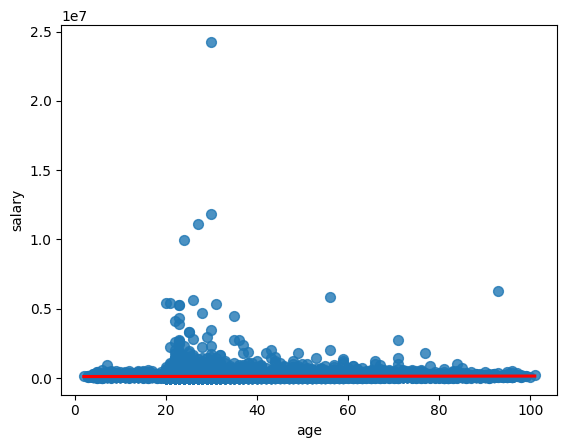

In [46]:
# Crear un gráfico de regresión utilizando seaborn
# Se utiliza la columna 'age' como eje x y 'salary' como eje y del DataFrame df_easy_i_plot
# scatter_kws se utiliza para ajustar el tamaño de los puntos en el gráfico de dispersión
# line_kws se utiliza para ajustar el color de la línea de regresión
sns.regplot(x="age", y="salary", data=df_easy_i_plot, scatter_kws={'s': 50}, line_kws={'color': 'red'})

# Feature engineering

## 4. Creación de nuevas variables

In [47]:
# Crear una copia del DataFrame df_easy_i y asignarla a df_easy_cv
df_easy_cv = df_easy_i.copy()

In [48]:
# Contar el número de clientes únicos en el DataFrame df_easy_cv
len(df_easy_cv['pk_cid'].unique())

454753

In [49]:
# Imprimir la fecha mínima de la columna 'entry_date'
print(df_easy_cv['entry_date'].min())

# Imprimir la fecha máxima de la columna 'pk_partition'
print(df_easy_cv['pk_partition'].max())

2015-01-01 00:00:00
2019-05-28 00:00:00


In [50]:
# Calcular la media de la columna 'salary' en el DataFrame df_easy_cv
df_easy_cv['salary'].mean()

115009.38964633709

In [51]:
# Definir la lista de productos de cuenta
prod_cuentas = ['em_account_p', 'em_account_pp', 'emc_account', 'debit_card', 'payroll', 'payroll_account']

# Definir la lista de productos de ahorro e inversión
prod_ahorro_inversion = ['securities', 'pension_plan', 'short_term_deposit', 'long_term_deposit', 'funds']

# Definir la lista de productos de financiación
prod_financiacion = ['mortgage', 'loans', 'credit_card']

# Combinar todas las listas de productos en una sola lista
productos_total = prod_cuentas + prod_ahorro_inversion + prod_financiacion 

# Imprimir la longitud de cada lista de productos
print(len(prod_cuentas))
print(len(prod_ahorro_inversion))
print(len(prod_financiacion))

# Hemos quitado la variable 'em_account' de prod_cuenta porque la tenían demasiados clientes y no nos ayudará a predecir los productos que contratarán

6
5
3


In [52]:
# Creamos nueva columna 'tiene_prod_cuenta' 
df_easy_cv['tiene_prod_cuenta'] = df_easy_cv[prod_cuentas].any(axis=1).astype('int16')

In [53]:
# Filtrar el DataFrame para obtener los registros donde la fecha de partición es la máxima (última fecha disponible)
# y contar la frecuencia de los valores en la columna 'tiene_prod_cuenta', normalizando los resultados.
df_easy_cv[df_easy_cv['pk_partition'] == df_easy_cv['pk_partition'].max()]['tiene_prod_cuenta'].value_counts(normalize=True)

tiene_prod_cuenta
0    0.839105
1    0.160895
Name: proportion, dtype: float64

In [54]:
# Creamos nueva columna 'tiene_prod_ahorro' 
df_easy_cv['tiene_prod_ahorro_inv'] = df_easy_cv[prod_ahorro_inversion].any(axis=1).astype('int16')

In [55]:
# Creamos nueva columna 'tiene_prod_financiacion' 
df_easy_cv['tiene_prod_financiacion'] = df_easy_cv[prod_financiacion].any(axis=1).astype('int16')

In [56]:
# Vemos que active customer es independiente de la tenencia de productos
# pasa de 1 a 0 en el mes en el que deja de tener el producto debit_card
# Tambien tiene em_acount pero deja de tenerlo el mes anterior.
# El cambio de estado de active customer es debido a la baja de debit card o em acount?
df_easy_cv[df_easy_cv['pk_cid']==1050337]

,entry_channel,payroll,pension_plan,gender,pk_cid,pk_partition,entry_date,active_customer,segment,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,em_account_pp,credit_card,payroll_account,emc_account,debit_card,em_account_p,em_acount,country_id,region_code,age,deceased,salary,tiene_prod_cuenta,tiene_prod_ahorro_inv,tiene_prod_financiacion
543,KHE,0,0,H,1050337,2018-01-28,2015-08-10,1,03 - UNIVERSITARIO,0,0,0,0,0,0,0,0,0,0,0,0,0,ES,45.0,31,N,24624.6,0,0,0
473267,KHE,0,0,H,1050337,2018-02-28,2015-08-10,1,03 - UNIVERSITARIO,0,0,0,0,0,0,0,0,0,0,1,0,0,ES,45.0,31,N,24624.6,1,0,0
694145,KHE,0,0,H,1050337,2018-03-28,2015-08-10,1,03 - UNIVERSITARIO,0,0,0,0,0,0,0,0,0,0,1,0,1,ES,45.0,31,N,24624.6,1,0,0
969294,KHE,0,0,H,1050337,2018-04-28,2015-08-10,1,03 - UNIVERSITARIO,0,0,0,0,0,0,0,0,0,0,1,0,1,ES,45.0,31,N,24624.6,1,0,0
1007580,KHE,0,0,H,1050337,2018-05-28,2015-08-10,1,03 - UNIVERSITARIO,0,0,0,0,0,0,0,0,0,0,1,0,0,ES,45.0,31,N,24624.6,1,0,0
1258651,KHE,0,0,H,1050337,2018-06-28,2015-08-10,1,03 - UNIVERSITARIO,0,0,0,0,0,0,0,0,0,0,0,0,0,ES,45.0,31,N,24624.6,0,0,0
1583498,KHE,0,0,H,1050337,2018-07-28,2015-08-10,1,03 - UNIVERSITARIO,0,0,0,0,0,0,0,0,0,0,1,0,1,ES,45.0,31,N,24624.6,1,0,0
2050171,KHE,0,0,H,1050337,2018-08-28,2015-08-10,1,03 - UNIVERSITARIO,0,0,0,0,0,0,0,0,0,0,1,0,1,ES,45.0,31,N,24624.6,1,0,0
2330528,KHE,0,0,H,1050337,2018-09-28,2015-08-10,1,03 - UNIVERSITARIO,0,0,0,0,0,0,0,0,0,0,1,0,1,ES,45.0,31,N,24624.6,1,0,0
2673516,KHE,0,0,H,1050337,2018-10-28,2015-08-10,1,03 - UNIVERSITARIO,0,0,0,0,0,0,0,0,0,0,1,0,0,ES,45.0,31,N,24624.6,1,0,0


In [57]:
# Hay clientes que no han tenido productos en ninguno de los registros
df_easy_cv[df_easy_cv['pk_cid']==1050693]


,entry_channel,payroll,pension_plan,gender,pk_cid,pk_partition,entry_date,active_customer,segment,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,em_account_pp,credit_card,payroll_account,emc_account,debit_card,em_account_p,em_acount,country_id,region_code,age,deceased,salary,tiene_prod_cuenta,tiene_prod_ahorro_inv,tiene_prod_financiacion
46,KFC,0,0,V,1050693,2018-01-28,2015-08-10,0,02 - PARTICULARES,0,0,0,0,0,0,0,0,0,0,0,0,0,ES,8.0,37,N,104035.08,0,0,0
472401,KFC,0,0,V,1050693,2018-02-28,2015-08-10,0,02 - PARTICULARES,0,0,0,0,0,0,0,0,0,0,0,0,0,ES,8.0,37,N,104035.08,0,0,0
693291,KFC,0,0,V,1050693,2018-03-28,2015-08-10,0,02 - PARTICULARES,0,0,0,0,0,0,0,0,0,0,0,0,0,ES,8.0,37,N,104035.08,0,0,0
969645,KFC,0,0,V,1050693,2018-04-28,2015-08-10,0,02 - PARTICULARES,0,0,0,0,0,0,0,0,0,0,0,0,0,ES,8.0,37,N,104035.08,0,0,0
981376,KFC,0,0,V,1050693,2018-05-28,2015-08-10,0,02 - PARTICULARES,0,0,0,0,0,0,0,0,0,0,0,0,0,ES,8.0,37,N,104035.08,0,0,0
1257064,KFC,0,0,V,1050693,2018-06-28,2015-08-10,0,02 - PARTICULARES,0,0,0,0,0,0,0,0,0,0,0,0,0,ES,8.0,37,N,104035.08,0,0,0
1581736,KFC,0,0,V,1050693,2018-07-28,2015-08-10,0,02 - PARTICULARES,0,0,0,0,0,0,0,0,0,0,0,0,0,ES,8.0,37,N,104035.08,0,0,0
2050287,KFC,0,0,V,1050693,2018-08-28,2015-08-10,0,02 - PARTICULARES,0,0,0,0,0,0,0,0,0,0,0,0,0,ES,8.0,37,N,104035.08,0,0,0
2331189,KFC,0,0,V,1050693,2018-09-28,2015-08-10,0,02 - PARTICULARES,0,0,0,0,0,0,0,0,0,0,0,0,0,ES,8.0,37,N,104035.08,0,0,0
2673655,KFC,0,0,V,1050693,2018-10-28,2015-08-10,0,02 - PARTICULARES,0,0,0,0,0,0,0,0,0,0,0,0,0,ES,8.0,37,N,104035.08,0,0,0


In [58]:
# Selecciona la fila en la posición 543 del DataFrame df_easy_cv
df_easy_cv.iloc[543]

entry_channel                              KHE
payroll                                      0
pension_plan                                 0
gender                                       H
pk_cid                                 1050337
pk_partition               2018-01-28 00:00:00
entry_date                 2015-08-10 00:00:00
active_customer                              1
segment                     03 - UNIVERSITARIO
short_term_deposit                           0
loans                                        0
mortgage                                     0
funds                                        0
securities                                   0
long_term_deposit                            0
em_account_pp                                0
credit_card                                  0
payroll_account                              0
emc_account                                  0
debit_card                                   0
em_account_p                                 0
em_acount    

In [59]:
# Mostrar información general del DataFrame df_easy_cv, incluyendo el número de entradas,
# el número de columnas, el tipo de datos de cada columna y la cantidad de valores no nulos.
df_easy_cv.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5954247 entries, 0 to 5962923
Data columns (total 30 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   entry_channel            object        
 1   payroll                  int16         
 2   pension_plan             int16         
 3   gender                   object        
 4   pk_cid                   int32         
 5   pk_partition             datetime64[ns]
 6   entry_date               datetime64[ns]
 7   active_customer          int16         
 8   segment                  object        
 9   short_term_deposit       int16         
 10  loans                    int16         
 11  mortgage                 int16         
 12  funds                    int16         
 13  securities               int16         
 14  long_term_deposit        int16         
 15  em_account_pp            int16         
 16  credit_card              int16         
 17  payroll_account          int16  

In [60]:
# Calcular la diferencia en días entre la fecha de partición y la fecha de entrada
df_easy_cv['days_since_entry'] = df_easy_cv['pk_partition'] - df_easy_cv['entry_date']

# Convertir la diferencia de tiempo a días
df_easy_cv['days_since_entry'] = df_easy_cv['days_since_entry'].dt.days

In [61]:
# Mostrar el DataFrame df_easy_cv
df_easy_cv

,entry_channel,payroll,pension_plan,gender,pk_cid,pk_partition,entry_date,active_customer,segment,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,em_account_pp,credit_card,payroll_account,emc_account,debit_card,em_account_p,em_acount,country_id,region_code,age,deceased,salary,tiene_prod_cuenta,tiene_prod_ahorro_inv,tiene_prod_financiacion,days_since_entry
0,KHL,0,0,H,1375586,2018-01-28,2018-01-12,1,02 - PARTICULARES,0,0,0,0,0,0,0,0,0,0,0,0,1,ES,29.0,35,N,87218.100000,0,0,0,16
1,KHE,0,0,V,1050611,2018-01-28,2015-08-10,0,03 - UNIVERSITARIO,0,0,0,0,0,0,0,0,0,0,0,0,1,ES,13.0,23,N,35548.740000,0,0,0,902
2,KHE,0,0,V,1050612,2018-01-28,2015-08-10,0,03 - UNIVERSITARIO,0,0,0,0,0,0,0,0,0,0,0,0,1,ES,13.0,23,N,122179.110000,0,0,0,902
3,KHD,0,0,H,1050613,2018-01-28,2015-08-10,0,03 - UNIVERSITARIO,1,0,0,0,0,0,0,0,0,0,0,0,0,ES,50.0,22,N,119775.540000,0,1,0,902
4,KHE,0,0,V,1050614,2018-01-28,2015-08-10,1,03 - UNIVERSITARIO,0,0,0,0,0,0,0,0,0,0,0,0,1,ES,50.0,23,N,108744.600099,0,0,0,902
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5962919,KHE,0,0,V,1166765,2019-05-28,2016-08-14,0,03 - UNIVERSITARIO,0,0,0,0,0,0,0,0,0,0,0,0,1,ES,50.0,22,N,43912.170000,0,0,0,1017
5962920,KHE,0,0,V,1166764,2019-05-28,2016-08-14,0,03 - UNIVERSITARIO,0,0,0,0,0,0,0,0,0,0,0,0,1,ES,26.0,23,N,23334.990000,0,0,0,1017
5962921,KHE,0,0,H,1166763,2019-05-28,2016-08-14,1,02 - PARTICULARES,0,0,0,0,0,0,0,0,0,0,0,0,1,ES,50.0,47,N,82168.838319,0,0,0,1017
5962922,KHE,0,0,H,1166789,2019-05-28,2016-08-14,0,03 - UNIVERSITARIO,0,0,0,0,0,0,0,0,0,0,0,0,1,ES,50.0,22,N,199592.820000,0,0,0,1017


In [62]:
# Mostrar información general del DataFrame df_easy_cv, incluyendo el número de entradas,
# el número de columnas, el tipo de datos de cada columna y la cantidad de valores no nulos.
df_easy_cv.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5954247 entries, 0 to 5962923
Data columns (total 31 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   entry_channel            object        
 1   payroll                  int16         
 2   pension_plan             int16         
 3   gender                   object        
 4   pk_cid                   int32         
 5   pk_partition             datetime64[ns]
 6   entry_date               datetime64[ns]
 7   active_customer          int16         
 8   segment                  object        
 9   short_term_deposit       int16         
 10  loans                    int16         
 11  mortgage                 int16         
 12  funds                    int16         
 13  securities               int16         
 14  long_term_deposit        int16         
 15  em_account_pp            int16         
 16  credit_card              int16         
 17  payroll_account          int16  

1. Variacion salarial

In [ ]:
def calcular_variacion_salarial(df, cliente_col, salario_col):
    """
    Calcula la variación del salario de cada cliente entre el registro actual y su primer registro.
    Argumentos:
        df (pd.DataFrame): DataFrame con los datos.
        cliente_col (str): Nombre de la columna que identifica a los clientes.
        salario_col (str): Nombre de la columna que contiene los salarios.
    Devuelve:
        pd.DataFrame: DataFrame original con una nueva columna "variacion_salarial".
    """
    # Ordenar por cliente y por fecha para asegurar que los registros están correctamente ordenados
    df = df.sort_values(by=[cliente_col, "pk_partition"])
    # Obtener el salario del primer registro para cada cliente
    df["salario_inicial"] = df.groupby(cliente_col)[salario_col].transform("first")
    # Calcular la variación del salario
    df["variacion_salarial_abs"] = df[salario_col] - df["salario_inicial"]
    # Eliminar la columna temporal si no es necesaria
    return df.drop(columns=["salario_inicial"])

In [65]:
# Calcular la variación salarial para cada cliente
df_easy_cv = calcular_variacion_salarial(df_easy_cv, 'pk_cid', 'salary')

# Mostrar el DataFrame resultante
df_easy_cv

,entry_channel,payroll,pension_plan,gender,pk_cid,pk_partition,entry_date,active_customer,segment,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,em_account_pp,credit_card,payroll_account,emc_account,debit_card,em_account_p,em_acount,country_id,region_code,age,deceased,salary,tiene_prod_cuenta,tiene_prod_ahorro_inv,tiene_prod_financiacion,days_since_entry,variacion_salarial_abs
1479563,KAT,0,0,H,15891,2018-07-28,2018-07-28,1,Desconocido,0,0,0,0,0,0,0,0,0,0,0,0,1,ES,28.0,59,N,170656.930000,0,0,0,0,0.000000
2168122,KAT,0,0,H,15891,2018-08-28,2018-07-28,0,02 - PARTICULARES,0,0,0,0,0,0,0,0,0,0,0,0,0,ES,28.0,59,N,176309.679845,0,0,0,31,5652.749845
2962973,KAT,0,0,H,16063,2018-11-28,2018-11-19,1,Desconocido,0,0,0,0,0,0,0,0,0,0,0,0,0,ES,28.0,62,N,141213.851739,0,0,0,9,0.000000
3628236,KAT,0,0,H,16063,2018-12-28,2018-11-19,1,02 - PARTICULARES,0,0,0,0,0,0,0,0,0,0,0,0,0,ES,28.0,62,N,160980.198311,0,0,0,39,19766.346572
4028169,KAT,0,0,H,16063,2019-01-28,2018-11-19,1,02 - PARTICULARES,0,0,0,0,0,0,0,0,0,0,0,0,0,ES,28.0,62,N,160980.198311,0,0,0,70,19766.346572
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5679916,KHE,0,0,V,1553685,2019-05-28,2019-05-31,0,Desconocido,0,0,0,0,0,0,0,0,0,0,0,0,0,ES,13.0,52,N,52673.925000,0,0,0,-3,0.000000
5679915,KHE,0,0,H,1553686,2019-05-28,2019-05-31,0,Desconocido,0,0,0,0,0,0,0,0,0,0,0,0,0,ES,41.0,30,N,113105.705172,0,0,0,-3,0.000000
5679914,KHE,0,0,V,1553687,2019-05-28,2019-05-31,0,Desconocido,0,0,0,0,0,0,0,0,0,0,0,0,0,ES,28.0,21,N,170286.024236,0,0,0,-3,0.000000
5679913,KHE,0,0,H,1553688,2019-05-28,2019-05-31,0,Desconocido,0,0,0,0,0,0,0,0,0,0,0,0,0,ES,39.0,43,N,355549.267500,0,0,0,-3,0.000000


In [66]:
# Existen valores negativos
df_easy_cv[df_easy_cv['variacion_salarial_abs'] < 0]


,entry_channel,payroll,pension_plan,gender,pk_cid,pk_partition,entry_date,active_customer,segment,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,em_account_pp,credit_card,payroll_account,emc_account,debit_card,em_account_p,em_acount,country_id,region_code,age,deceased,salary,tiene_prod_cuenta,tiene_prod_ahorro_inv,tiene_prod_financiacion,days_since_entry,variacion_salarial_abs
4028170,KAT,0,0,V,16203,2019-01-28,2018-12-23,1,02 - PARTICULARES,0,0,0,0,0,0,0,0,0,0,0,0,1,ES,8.0,70,N,150435.370030,0,0,0,36,-104185.974970
4480636,KAT,0,0,V,16203,2019-02-28,2018-12-23,1,01 - TOP,0,0,0,0,0,0,0,0,0,0,0,0,1,ES,8.0,70,N,152841.136667,0,0,0,67,-101780.208333
4876039,KAT,0,0,V,16203,2019-03-28,2018-12-23,1,01 - TOP,0,0,0,0,0,0,0,0,0,0,0,0,1,ES,8.0,70,N,152841.136667,0,0,0,95,-101780.208333
5134321,KAT,0,0,V,16203,2019-04-28,2018-12-23,1,01 - TOP,0,0,0,0,0,0,0,0,0,0,0,0,1,ES,8.0,70,N,152841.136667,0,0,0,126,-101780.208333
5523396,KAT,0,0,V,16203,2019-05-28,2018-12-23,1,01 - TOP,0,0,0,0,0,0,0,0,0,0,0,0,1,ES,8.0,70,N,152841.136667,0,0,0,156,-101780.208333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5683005,KHM,0,0,V,1548181,2019-05-28,2019-04-29,1,02 - PARTICULARES,0,0,0,0,0,0,0,0,0,0,0,0,1,ES,45.0,35,N,74494.962826,0,0,0,29,-27215.856667
5682998,KHE,0,0,H,1548192,2019-05-28,2019-04-29,0,02 - PARTICULARES,0,0,0,0,0,0,0,0,0,0,0,0,0,ES,23.0,72,N,92120.046000,0,0,0,29,-51353.140673
5682997,KHM,0,0,H,1548193,2019-05-28,2019-04-29,0,02 - PARTICULARES,0,0,0,0,0,0,0,0,0,0,0,0,0,ES,31.0,87,N,130935.606883,0,0,0,29,-16006.016559
5683007,KHM,1,1,V,1548197,2019-05-28,2019-04-29,1,02 - PARTICULARES,0,0,0,0,0,0,0,0,0,0,1,0,1,ES,29.0,40,N,104560.567417,1,1,0,29,-95566.858583


In [67]:
# Filtrar el DataFrame para obtener los registros donde el cliente tiene tanto productos de cuenta como productos de ahorro/inversión
df_easy_cv[(df_easy_cv['tiene_prod_cuenta'] == 1) & (df_easy_cv['tiene_prod_ahorro_inv'] == 1)]

,entry_channel,payroll,pension_plan,gender,pk_cid,pk_partition,entry_date,active_customer,segment,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,em_account_pp,credit_card,payroll_account,emc_account,debit_card,em_account_p,em_acount,country_id,region_code,age,deceased,salary,tiene_prod_cuenta,tiene_prod_ahorro_inv,tiene_prod_financiacion,days_since_entry,variacion_salarial_abs
2171487,KAT,0,0,H,17457,2018-09-28,2017-09-16,1,02 - PARTICULARES,0,0,0,0,0,1,0,0,0,0,1,0,1,ES,28.0,53,N,102405.750000,1,1,0,377,0.0
2962562,KAT,0,0,H,17457,2018-11-28,2017-09-16,1,02 - PARTICULARES,0,0,0,0,0,1,0,0,0,0,1,0,1,ES,28.0,53,N,102405.750000,1,1,0,438,0.0
4029237,KAT,0,0,H,17457,2019-01-28,2017-09-16,1,02 - PARTICULARES,0,0,0,0,0,1,0,0,0,0,1,0,1,ES,28.0,53,N,102405.750000,1,1,0,499,0.0
4876041,KAT,0,0,H,17457,2019-03-28,2017-09-16,1,02 - PARTICULARES,0,0,0,0,0,1,0,0,0,0,1,0,1,ES,28.0,53,N,102405.750000,1,1,0,558,0.0
5523398,KAT,0,0,H,17457,2019-05-28,2017-09-16,1,02 - PARTICULARES,0,0,0,0,0,1,0,0,0,0,1,0,1,ES,28.0,54,N,102405.750000,1,1,0,619,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5680611,KHE,1,1,H,1551597,2019-05-28,2019-05-19,1,Desconocido,0,0,0,0,0,0,0,0,0,0,0,0,1,ES,28.0,46,N,140365.154348,1,1,0,9,0.0
5680241,KHE,1,1,V,1551712,2019-05-28,2019-05-19,1,Desconocido,0,0,0,0,0,0,0,0,0,0,0,0,1,ES,41.0,31,N,79705.812000,1,1,0,9,0.0
5680434,KHE,1,1,H,1551832,2019-05-28,2019-05-20,1,Desconocido,0,0,0,0,0,0,0,0,0,0,0,0,1,ES,28.0,50,N,135847.950448,1,1,0,8,0.0
5680940,KHE,1,1,H,1552055,2019-05-28,2019-05-22,1,Desconocido,0,0,0,0,0,0,0,0,0,0,1,0,1,ES,46.0,46,N,118393.297500,1,1,0,6,0.0


2. total de productos excluyendo la target

In [ ]:
def calcular_productos_unicos_por_target(df, cliente_col, productos_cols, targets_dict):
    """
    Calcula el total de productos únicos contratados por cada cliente, excluyendo los productos que conforman cada target.
    Argumentos:
        df (pd.DataFrame): DataFrame con datos históricos de clientes.
        cliente_col (str): Nombre de la columna que identifica a los clientes.
        productos_cols (list): Lista de columnas que representan todos los productos contratados.
        targets_dict (dict): Diccionario donde las claves son nombres de las columnas target
                             y los valores son listas de columnas que las conforman.
    Devuelve:
        pd.DataFrame: DataFrame con columnas adicionales para cada target con los productos únicos restantes.
    """
    # Crear un DataFrame de trabajo para evitar modificar el original
    df_resultado = df.copy()
    for target, target_productos in targets_dict.items():
        # Filtrar las columnas de productos excluyendo las que forman el target actual
        productos_restantes = [col for col in productos_cols if col not in target_productos]
        # Agrupar por cliente y calcular el máximo para las columnas restantes
        productos_historicos = df.groupby(cliente_col)[productos_restantes].max()
        # Sumar los productos únicos contratados por cliente (excluyendo el target actual)
        productos_historicos[f"total_sin_{target}"] = productos_historicos.sum(axis=1)
        # Crear un diccionario con cliente_id y su total de productos únicos (sin el target actual)
        total_productos = productos_historicos[f"total_sin_{target}"].to_dict()
        # Agregar la columna correspondiente al DataFrame resultado
        df_resultado[f"total_sin_{target}"] = df_resultado[cliente_col].map(total_productos)
    return df_resultado

In [69]:
# Definir un diccionario con los targets y las columnas de productos que los conforman
targets_dict = {
    "tiene_prod_cuenta": ['em_account_p', 'em_account_pp', 'em_acount', 'emc_account', 'debit_card', 'payroll', 'payroll_account'],
    "tiene_prod_ahorro_inv": ['securities', 'pension_plan', 'short_term_deposit', 'long_term_deposit', 'funds'],
    "tiene_prod_financiacion": ['mortgage', 'loans', 'credit_card']
}

# Definir una lista con todas las columnas de productos
productos_cols = [
    'em_account_p', 'em_account_pp', 'em_acount', 'emc_account', 'debit_card', 'payroll', 'payroll_account',
    'securities', 'pension_plan', 'short_term_deposit', 'long_term_deposit', 'funds',  
    'mortgage', 'loans', 'credit_card'
]

# Calcular el total de productos únicos contratados por cada cliente, excluyendo los productos que conforman cada target
df_easy_cv = calcular_productos_unicos_por_target(
    df=df_easy_cv,
    cliente_col="pk_cid",
    productos_cols=productos_cols,
    targets_dict=targets_dict
)

In [70]:
df_easy_cv

,entry_channel,payroll,pension_plan,gender,pk_cid,pk_partition,entry_date,active_customer,segment,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,em_account_pp,credit_card,payroll_account,emc_account,debit_card,em_account_p,em_acount,country_id,region_code,age,deceased,salary,tiene_prod_cuenta,tiene_prod_ahorro_inv,tiene_prod_financiacion,days_since_entry,variacion_salarial_abs,total_sin_tiene_prod_cuenta,total_sin_tiene_prod_ahorro_inv,total_sin_tiene_prod_financiacion
1479563,KAT,0,0,H,15891,2018-07-28,2018-07-28,1,Desconocido,0,0,0,0,0,0,0,0,0,0,0,0,1,ES,28.0,59,N,170656.930000,0,0,0,0,0.000000,0,1,1
2168122,KAT,0,0,H,15891,2018-08-28,2018-07-28,0,02 - PARTICULARES,0,0,0,0,0,0,0,0,0,0,0,0,0,ES,28.0,59,N,176309.679845,0,0,0,31,5652.749845,0,1,1
2962973,KAT,0,0,H,16063,2018-11-28,2018-11-19,1,Desconocido,0,0,0,0,0,0,0,0,0,0,0,0,0,ES,28.0,62,N,141213.851739,0,0,0,9,0.000000,0,0,0
3628236,KAT,0,0,H,16063,2018-12-28,2018-11-19,1,02 - PARTICULARES,0,0,0,0,0,0,0,0,0,0,0,0,0,ES,28.0,62,N,160980.198311,0,0,0,39,19766.346572,0,0,0
4028169,KAT,0,0,H,16063,2019-01-28,2018-11-19,1,02 - PARTICULARES,0,0,0,0,0,0,0,0,0,0,0,0,0,ES,28.0,62,N,160980.198311,0,0,0,70,19766.346572,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5679916,KHE,0,0,V,1553685,2019-05-28,2019-05-31,0,Desconocido,0,0,0,0,0,0,0,0,0,0,0,0,0,ES,13.0,52,N,52673.925000,0,0,0,-3,0.000000,0,0,0
5679915,KHE,0,0,H,1553686,2019-05-28,2019-05-31,0,Desconocido,0,0,0,0,0,0,0,0,0,0,0,0,0,ES,41.0,30,N,113105.705172,0,0,0,-3,0.000000,0,0,0
5679914,KHE,0,0,V,1553687,2019-05-28,2019-05-31,0,Desconocido,0,0,0,0,0,0,0,0,0,0,0,0,0,ES,28.0,21,N,170286.024236,0,0,0,-3,0.000000,0,0,0
5679913,KHE,0,0,H,1553688,2019-05-28,2019-05-31,0,Desconocido,0,0,0,0,0,0,0,0,0,0,0,0,0,ES,39.0,43,N,355549.267500,0,0,0,-3,0.000000,0,0,0


3. Se ha dado de baja por tipo de producto

In [71]:
def baja_tipo_producto(df, client_id_col):
    # Ordenamos el DataFrame por el identificador del cliente
    df = df.sort_values(by=[client_id_col])
    
    # Creamos columnas temporales que contienen el valor del mes anterior para cada tipo de producto
    df["prev_cuenta"] = df.groupby(client_id_col)["tiene_prod_cuenta"].shift(1)
    df["prev_ahorro"] = df.groupby(client_id_col)["tiene_prod_ahorro_inv"].shift(1)
    df["prev_finan"] = df.groupby(client_id_col)["tiene_prod_financiacion"].shift(1)

    # Convertimos NaN en 0 porque un cliente nuevo no puede tener una baja de un producto anterior
    df[["prev_cuenta", "prev_ahorro", "prev_finan"]] = df[["prev_cuenta", "prev_ahorro", "prev_finan"]].fillna(0)

    # Verificamos si el cliente tenía el producto el mes anterior y ya no lo tiene este mes
    df["prev_cuenta"] = ((df["prev_cuenta"] == 1) & (df["tiene_prod_cuenta"] == 0)).astype(int)
    df["prev_ahorro"] = ((df["prev_ahorro"] == 1) & (df["tiene_prod_ahorro_inv"] == 0)).astype(int)
    df["prev_finan"] = ((df["prev_finan"] == 1) & (df["tiene_prod_financiacion"] == 0)).astype(int)

    return df


In [72]:
# Aplicar la función baja_tipo_producto para identificar si un cliente ha dejado de tener un tipo de producto
df_easy_cv = baja_tipo_producto(df_easy_cv, 'pk_cid')

# Mostrar el DataFrame resultante
df_easy_cv

# El resultado es bastante parecido a total_sin_tiene_prod...
# Habría que ver si tienen mucha correlación y si eliminamos una de las dos

,entry_channel,payroll,pension_plan,gender,pk_cid,pk_partition,entry_date,active_customer,segment,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,em_account_pp,credit_card,payroll_account,emc_account,debit_card,em_account_p,em_acount,country_id,region_code,age,deceased,salary,tiene_prod_cuenta,tiene_prod_ahorro_inv,tiene_prod_financiacion,days_since_entry,variacion_salarial_abs,total_sin_tiene_prod_cuenta,total_sin_tiene_prod_ahorro_inv,total_sin_tiene_prod_financiacion,prev_cuenta,prev_ahorro,prev_finan
1479563,KAT,0,0,H,15891,2018-07-28,2018-07-28,1,Desconocido,0,0,0,0,0,0,0,0,0,0,0,0,1,ES,28.0,59,N,170656.930000,0,0,0,0,0.000000,0,1,1,0,0,0
2168122,KAT,0,0,H,15891,2018-08-28,2018-07-28,0,02 - PARTICULARES,0,0,0,0,0,0,0,0,0,0,0,0,0,ES,28.0,59,N,176309.679845,0,0,0,31,5652.749845,0,1,1,0,0,0
2962973,KAT,0,0,H,16063,2018-11-28,2018-11-19,1,Desconocido,0,0,0,0,0,0,0,0,0,0,0,0,0,ES,28.0,62,N,141213.851739,0,0,0,9,0.000000,0,0,0,0,0,0
3628236,KAT,0,0,H,16063,2018-12-28,2018-11-19,1,02 - PARTICULARES,0,0,0,0,0,0,0,0,0,0,0,0,0,ES,28.0,62,N,160980.198311,0,0,0,39,19766.346572,0,0,0,0,0,0
4028169,KAT,0,0,H,16063,2019-01-28,2018-11-19,1,02 - PARTICULARES,0,0,0,0,0,0,0,0,0,0,0,0,0,ES,28.0,62,N,160980.198311,0,0,0,70,19766.346572,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5679916,KHE,0,0,V,1553685,2019-05-28,2019-05-31,0,Desconocido,0,0,0,0,0,0,0,0,0,0,0,0,0,ES,13.0,52,N,52673.925000,0,0,0,-3,0.000000,0,0,0,0,0,0
5679915,KHE,0,0,H,1553686,2019-05-28,2019-05-31,0,Desconocido,0,0,0,0,0,0,0,0,0,0,0,0,0,ES,41.0,30,N,113105.705172,0,0,0,-3,0.000000,0,0,0,0,0,0
5679914,KHE,0,0,V,1553687,2019-05-28,2019-05-31,0,Desconocido,0,0,0,0,0,0,0,0,0,0,0,0,0,ES,28.0,21,N,170286.024236,0,0,0,-3,0.000000,0,0,0,0,0,0
5679913,KHE,0,0,H,1553688,2019-05-28,2019-05-31,0,Desconocido,0,0,0,0,0,0,0,0,0,0,0,0,0,ES,39.0,43,N,355549.267500,0,0,0,-3,0.000000,0,0,0,0,0,0


In [73]:
# Filtrar el DataFrame df_easy_cv para obtener los registros donde el 'pk_cid' es igual a 15891
df_easy_cv[df_easy_cv['pk_cid'] == 15891]
	

,entry_channel,payroll,pension_plan,gender,pk_cid,pk_partition,entry_date,active_customer,segment,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,em_account_pp,credit_card,payroll_account,emc_account,debit_card,em_account_p,em_acount,country_id,region_code,age,deceased,salary,tiene_prod_cuenta,tiene_prod_ahorro_inv,tiene_prod_financiacion,days_since_entry,variacion_salarial_abs,total_sin_tiene_prod_cuenta,total_sin_tiene_prod_ahorro_inv,total_sin_tiene_prod_financiacion,prev_cuenta,prev_ahorro,prev_finan
1479563,KAT,0,0,H,15891,2018-07-28,2018-07-28,1,Desconocido,0,0,0,0,0,0,0,0,0,0,0,0,1,ES,28.0,59,N,170656.930000,0,0,0,0,0.000000,0,1,1,0,0,0
2168122,KAT,0,0,H,15891,2018-08-28,2018-07-28,0,02 - PARTICULARES,0,0,0,0,0,0,0,0,0,0,0,0,0,ES,28.0,59,N,176309.679845,0,0,0,31,5652.749845,0,1,1,0,0,0


In [74]:
df_easy_cv[df_easy_cv['pk_cid']==16063]

,entry_channel,payroll,pension_plan,gender,pk_cid,pk_partition,entry_date,active_customer,segment,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,em_account_pp,credit_card,payroll_account,emc_account,debit_card,em_account_p,em_acount,country_id,region_code,age,deceased,salary,tiene_prod_cuenta,tiene_prod_ahorro_inv,tiene_prod_financiacion,days_since_entry,variacion_salarial_abs,total_sin_tiene_prod_cuenta,total_sin_tiene_prod_ahorro_inv,total_sin_tiene_prod_financiacion,prev_cuenta,prev_ahorro,prev_finan
2962973,KAT,0,0,H,16063,2018-11-28,2018-11-19,1,Desconocido,0,0,0,0,0,0,0,0,0,0,0,0,0,ES,28.0,62,N,141213.851739,0,0,0,9,0.000000,0,0,0,0,0,0
3628236,KAT,0,0,H,16063,2018-12-28,2018-11-19,1,02 - PARTICULARES,0,0,0,0,0,0,0,0,0,0,0,0,0,ES,28.0,62,N,160980.198311,0,0,0,39,19766.346572,0,0,0,0,0,0
4028169,KAT,0,0,H,16063,2019-01-28,2018-11-19,1,02 - PARTICULARES,0,0,0,0,0,0,0,0,0,0,0,0,0,ES,28.0,62,N,160980.198311,0,0,0,70,19766.346572,0,0,0,0,0,0
4480637,KAT,0,0,H,16063,2019-02-28,2018-11-19,1,02 - PARTICULARES,0,0,0,0,0,0,0,0,0,0,0,0,0,ES,28.0,62,N,160980.198311,0,0,0,101,19766.346572,0,0,0,0,0,0
4876040,KAT,0,0,H,16063,2019-03-28,2018-11-19,0,02 - PARTICULARES,0,0,0,0,0,0,0,0,0,0,0,0,0,ES,28.0,62,N,160980.198311,0,0,0,129,19766.346572,0,0,0,0,0,0
5134317,KAT,0,0,H,16063,2019-04-28,2018-11-19,1,02 - PARTICULARES,0,0,0,0,0,0,0,0,0,0,0,0,0,ES,28.0,62,N,160980.198311,0,0,0,160,19766.346572,0,0,0,0,0,0
5523397,KAT,0,0,H,16063,2019-05-28,2018-11-19,0,02 - PARTICULARES,0,0,0,0,0,0,0,0,0,0,0,0,0,ES,28.0,62,N,160980.198311,0,0,0,190,19766.346572,0,0,0,0,0,0


In [75]:
# Tenemos unos 350.000 clientes unicos
# Contar el número de clientes únicos en el DataFrame df_easy_cv
len(df_easy_cv['pk_cid'].unique())

454753

In [76]:
# Clientes que no han tenido ningún producto nunca
# Los eliminamos entendiendo que clientes que nunca han comprado no van a comprar
df_easy_cv['tiene_producto'] = df_easy_cv['tiene_prod_cuenta'] + df_easy_cv['tiene_prod_ahorro_inv'] + df_easy_cv['tiene_prod_financiacion']

# Agrupamos por cliente y sumamos la columna 'tiene_producto' para obtener el total de productos por cliente
df_easy_borrar = df_easy_cv.groupby('pk_cid')['tiene_producto'].sum().to_frame()

# Filtramos los clientes que nunca han tenido ningún producto
df_easy_borrar = df_easy_borrar[df_easy_borrar['tiene_producto'] == 0]

# Contamos el número de clientes que nunca han tenido ningún producto
len(df_easy_cv[df_easy_cv['tiene_producto'] == 0])


4930725

In [77]:
# Eliminamos 105.000 clientes 
# Contar el número de clientes que nunca han tenido ningún producto
len(df_easy_borrar)

356399

In [78]:
# Contar el número de filas en el DataFrame df_easy_cv
len(df_easy_cv)

5954247

In [79]:
# Eliminar la columna 'tiene_producto' del DataFrame df_easy_cv
del(df_easy_cv['tiene_producto'])

In [80]:
# Filtrar el DataFrame para obtener los registros donde el cliente no tiene productos de cuenta, ahorro/inversión ni financiación
df_easy_cv[(df_easy_cv['tiene_prod_cuenta'] == 0) & (df_easy_cv['tiene_prod_ahorro_inv'] == 0) & (df_easy_cv['tiene_prod_financiacion'] == 0)]

,entry_channel,payroll,pension_plan,gender,pk_cid,pk_partition,entry_date,active_customer,segment,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,em_account_pp,credit_card,payroll_account,emc_account,debit_card,em_account_p,em_acount,country_id,region_code,age,deceased,salary,tiene_prod_cuenta,tiene_prod_ahorro_inv,tiene_prod_financiacion,days_since_entry,variacion_salarial_abs,total_sin_tiene_prod_cuenta,total_sin_tiene_prod_ahorro_inv,total_sin_tiene_prod_financiacion,prev_cuenta,prev_ahorro,prev_finan
1479563,KAT,0,0,H,15891,2018-07-28,2018-07-28,1,Desconocido,0,0,0,0,0,0,0,0,0,0,0,0,1,ES,28.0,59,N,170656.930000,0,0,0,0,0.000000,0,1,1,0,0,0
2168122,KAT,0,0,H,15891,2018-08-28,2018-07-28,0,02 - PARTICULARES,0,0,0,0,0,0,0,0,0,0,0,0,0,ES,28.0,59,N,176309.679845,0,0,0,31,5652.749845,0,1,1,0,0,0
2962973,KAT,0,0,H,16063,2018-11-28,2018-11-19,1,Desconocido,0,0,0,0,0,0,0,0,0,0,0,0,0,ES,28.0,62,N,141213.851739,0,0,0,9,0.000000,0,0,0,0,0,0
3628236,KAT,0,0,H,16063,2018-12-28,2018-11-19,1,02 - PARTICULARES,0,0,0,0,0,0,0,0,0,0,0,0,0,ES,28.0,62,N,160980.198311,0,0,0,39,19766.346572,0,0,0,0,0,0
4028169,KAT,0,0,H,16063,2019-01-28,2018-11-19,1,02 - PARTICULARES,0,0,0,0,0,0,0,0,0,0,0,0,0,ES,28.0,62,N,160980.198311,0,0,0,70,19766.346572,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5679916,KHE,0,0,V,1553685,2019-05-28,2019-05-31,0,Desconocido,0,0,0,0,0,0,0,0,0,0,0,0,0,ES,13.0,52,N,52673.925000,0,0,0,-3,0.000000,0,0,0,0,0,0
5679915,KHE,0,0,H,1553686,2019-05-28,2019-05-31,0,Desconocido,0,0,0,0,0,0,0,0,0,0,0,0,0,ES,41.0,30,N,113105.705172,0,0,0,-3,0.000000,0,0,0,0,0,0
5679914,KHE,0,0,V,1553687,2019-05-28,2019-05-31,0,Desconocido,0,0,0,0,0,0,0,0,0,0,0,0,0,ES,28.0,21,N,170286.024236,0,0,0,-3,0.000000,0,0,0,0,0,0
5679913,KHE,0,0,H,1553688,2019-05-28,2019-05-31,0,Desconocido,0,0,0,0,0,0,0,0,0,0,0,0,0,ES,39.0,43,N,355549.267500,0,0,0,-3,0.000000,0,0,0,0,0,0


4. Ha vuelto a comprar (por tipo de producto) 

In [ ]:
def add_product_repurchase_columns(df, client_id_col, date_col):
    """
    Agrega columnas que indican si el cliente ha vuelto a comprar productos de cuenta, ahorro 
    o financieros después de haberlos dejado previamente.

    Argumentos:
    - df: DataFrame de pandas
    - client_id_col: str, nombre de la columna que identifica a los clientes
    - date_col: str, nombre de la columna con la fecha/mes (debe ser ordenable)

    Devuelve:
    - df: DataFrame de pandas con nuevas columnas
    """
    # Ordenar por cliente y fecha
    df = df.sort_values(by=[client_id_col, date_col])

    # Columnas desplazadas para detectar el estado anterior
    df["prev_cuenta"] = df.groupby(client_id_col)["tiene_prod_cuenta"].shift(1, fill_value=0)
    df["prev_ahorro"] = df.groupby(client_id_col)["tiene_prod_ahorro_inv"].shift(1, fill_value=0)
    df["prev_finan"] = df.groupby(client_id_col)["tiene_prod_financiacion"].shift(1, fill_value=0)

    # Crear un rastreador de estado acumulativo para verificar si el cliente ha dejado el tipo de producto antes
    df["dropped_cuenta"] = ((df["prev_cuenta"] == 1) & (df["tiene_prod_cuenta"] == 0)).groupby(df[client_id_col]).cumsum()
    df["dropped_ahorro"] = ((df["prev_ahorro"] == 1) & (df["tiene_prod_ahorro_inv"] == 0)).groupby(df[client_id_col]).cumsum()
    df["dropped_finan"] = ((df["prev_finan"] == 1) & (df["tiene_prod_financiacion"] == 0)).groupby(df[client_id_col]).cumsum()

    # Detectar recompra: El cliente había dejado previamente el producto y ahora lo tiene nuevamente (0 → 1)
    df["ha_recomprado_prod_cuenta"] = ((df["dropped_cuenta"] > 0) & (df["tiene_prod_cuenta"] == 1) & (df["prev_cuenta"] == 0)).astype(int)
    df["ha_recomprado_prod_ahorro"] = ((df["dropped_ahorro"] > 0) & (df["tiene_prod_ahorro_inv"] == 1) & (df["prev_ahorro"] == 0)).astype(int)
    df["ha_recomprado_prod_finan"] = ((df["dropped_finan"] > 0) & (df["tiene_prod_financiacion"] == 1) & (df["prev_finan"] == 0)).astype(int)

    # Eliminar columnas intermedias
    df.drop(columns=["prev_cuenta", "prev_ahorro", "prev_finan", "dropped_cuenta", "dropped_ahorro", "dropped_finan"], inplace=True)

    return df


In [82]:
# Aplicar la función add_product_repurchase_columns para identificar si un cliente ha vuelto a comprar productos de cuenta, ahorro o financiación después de haberlos dejado previamente
df_easy_cv = add_product_repurchase_columns(df_easy_cv, 'pk_cid', 'pk_partition')

# Mostrar el DataFrame resultante
df_easy_cv

,entry_channel,payroll,pension_plan,gender,pk_cid,pk_partition,entry_date,active_customer,segment,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,em_account_pp,credit_card,payroll_account,emc_account,debit_card,em_account_p,em_acount,country_id,region_code,age,deceased,salary,tiene_prod_cuenta,tiene_prod_ahorro_inv,tiene_prod_financiacion,days_since_entry,variacion_salarial_abs,total_sin_tiene_prod_cuenta,total_sin_tiene_prod_ahorro_inv,total_sin_tiene_prod_financiacion,ha_recomprado_prod_cuenta,ha_recomprado_prod_ahorro,ha_recomprado_prod_finan
1479563,KAT,0,0,H,15891,2018-07-28,2018-07-28,1,Desconocido,0,0,0,0,0,0,0,0,0,0,0,0,1,ES,28.0,59,N,170656.930000,0,0,0,0,0.000000,0,1,1,0,0,0
2168122,KAT,0,0,H,15891,2018-08-28,2018-07-28,0,02 - PARTICULARES,0,0,0,0,0,0,0,0,0,0,0,0,0,ES,28.0,59,N,176309.679845,0,0,0,31,5652.749845,0,1,1,0,0,0
2962973,KAT,0,0,H,16063,2018-11-28,2018-11-19,1,Desconocido,0,0,0,0,0,0,0,0,0,0,0,0,0,ES,28.0,62,N,141213.851739,0,0,0,9,0.000000,0,0,0,0,0,0
3628236,KAT,0,0,H,16063,2018-12-28,2018-11-19,1,02 - PARTICULARES,0,0,0,0,0,0,0,0,0,0,0,0,0,ES,28.0,62,N,160980.198311,0,0,0,39,19766.346572,0,0,0,0,0,0
4028169,KAT,0,0,H,16063,2019-01-28,2018-11-19,1,02 - PARTICULARES,0,0,0,0,0,0,0,0,0,0,0,0,0,ES,28.0,62,N,160980.198311,0,0,0,70,19766.346572,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5679916,KHE,0,0,V,1553685,2019-05-28,2019-05-31,0,Desconocido,0,0,0,0,0,0,0,0,0,0,0,0,0,ES,13.0,52,N,52673.925000,0,0,0,-3,0.000000,0,0,0,0,0,0
5679915,KHE,0,0,H,1553686,2019-05-28,2019-05-31,0,Desconocido,0,0,0,0,0,0,0,0,0,0,0,0,0,ES,41.0,30,N,113105.705172,0,0,0,-3,0.000000,0,0,0,0,0,0
5679914,KHE,0,0,V,1553687,2019-05-28,2019-05-31,0,Desconocido,0,0,0,0,0,0,0,0,0,0,0,0,0,ES,28.0,21,N,170286.024236,0,0,0,-3,0.000000,0,0,0,0,0,0
5679913,KHE,0,0,H,1553688,2019-05-28,2019-05-31,0,Desconocido,0,0,0,0,0,0,0,0,0,0,0,0,0,ES,39.0,43,N,355549.267500,0,0,0,-3,0.000000,0,0,0,0,0,0


5. Porcentaje de variacion salarial respecto al mes anterior

In [83]:
def add_salary_increase_column(df, client_id_col, date_col, salary_col):
    """
    Agrega una columna que indica el porcentaje de cambio en el salario en comparación con el mes anterior,
    asegurando que si el salario es NaN, el porcentaje de cambio se establece en 0.

    Parámetros:
    - df: DataFrame de pandas
    - client_id_col: str, nombre de la columna que identifica a los clientes
    - date_col: str, nombre de la columna con la fecha (debe ser ordenable)
    - salary_col: str, nombre de la columna con el salario

    Retorna:
    - df: DataFrame con una nueva columna 'salary_increase_pct'
    """
    # Ordenar por cliente y fecha para asegurar cálculos cronológicos correctos
    df = df.sort_values(by=[client_id_col, date_col])

    # Obtener el salario del mes anterior
    df["prev_salary"] = df.groupby(client_id_col)[salary_col].shift(1)

    # Calcular el porcentaje de aumento (evitar división por cero)
    df["salary_increase_pct"] = ((df[salary_col] - df["prev_salary"]) / df["prev_salary"]) * 100

    # Si el salario o el salario anterior es NaN, establecer el porcentaje de cambio en 0
    df["salary_increase_pct"] = df["salary_increase_pct"].fillna(0)

    # Eliminar la columna temporal
    df.drop(columns=["prev_salary"], inplace=True)

    return df



In [84]:
# Agregar una columna que indica el porcentaje de variación salarial respecto al mes anterior
df_easy_cv = add_salary_increase_column(df_easy_cv, 'pk_cid', 'pk_partition', 'salary')

# Mostrar el DataFrame resultante
df_easy_cv

,entry_channel,payroll,pension_plan,gender,pk_cid,pk_partition,entry_date,active_customer,segment,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,em_account_pp,credit_card,payroll_account,emc_account,debit_card,em_account_p,em_acount,country_id,region_code,age,deceased,salary,tiene_prod_cuenta,tiene_prod_ahorro_inv,tiene_prod_financiacion,days_since_entry,variacion_salarial_abs,total_sin_tiene_prod_cuenta,total_sin_tiene_prod_ahorro_inv,total_sin_tiene_prod_financiacion,ha_recomprado_prod_cuenta,ha_recomprado_prod_ahorro,ha_recomprado_prod_finan,salary_increase_pct
1479563,KAT,0,0,H,15891,2018-07-28,2018-07-28,1,Desconocido,0,0,0,0,0,0,0,0,0,0,0,0,1,ES,28.0,59,N,170656.930000,0,0,0,0,0.000000,0,1,1,0,0,0,0.000000
2168122,KAT,0,0,H,15891,2018-08-28,2018-07-28,0,02 - PARTICULARES,0,0,0,0,0,0,0,0,0,0,0,0,0,ES,28.0,59,N,176309.679845,0,0,0,31,5652.749845,0,1,1,0,0,0,3.312347
2962973,KAT,0,0,H,16063,2018-11-28,2018-11-19,1,Desconocido,0,0,0,0,0,0,0,0,0,0,0,0,0,ES,28.0,62,N,141213.851739,0,0,0,9,0.000000,0,0,0,0,0,0,0.000000
3628236,KAT,0,0,H,16063,2018-12-28,2018-11-19,1,02 - PARTICULARES,0,0,0,0,0,0,0,0,0,0,0,0,0,ES,28.0,62,N,160980.198311,0,0,0,39,19766.346572,0,0,0,0,0,0,13.997456
4028169,KAT,0,0,H,16063,2019-01-28,2018-11-19,1,02 - PARTICULARES,0,0,0,0,0,0,0,0,0,0,0,0,0,ES,28.0,62,N,160980.198311,0,0,0,70,19766.346572,0,0,0,0,0,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5679916,KHE,0,0,V,1553685,2019-05-28,2019-05-31,0,Desconocido,0,0,0,0,0,0,0,0,0,0,0,0,0,ES,13.0,52,N,52673.925000,0,0,0,-3,0.000000,0,0,0,0,0,0,0.000000
5679915,KHE,0,0,H,1553686,2019-05-28,2019-05-31,0,Desconocido,0,0,0,0,0,0,0,0,0,0,0,0,0,ES,41.0,30,N,113105.705172,0,0,0,-3,0.000000,0,0,0,0,0,0,0.000000
5679914,KHE,0,0,V,1553687,2019-05-28,2019-05-31,0,Desconocido,0,0,0,0,0,0,0,0,0,0,0,0,0,ES,28.0,21,N,170286.024236,0,0,0,-3,0.000000,0,0,0,0,0,0,0.000000
5679913,KHE,0,0,H,1553688,2019-05-28,2019-05-31,0,Desconocido,0,0,0,0,0,0,0,0,0,0,0,0,0,ES,39.0,43,N,355549.267500,0,0,0,-3,0.000000,0,0,0,0,0,0,0.000000


In [85]:
# Contar el número de valores nulos en cada columna del DataFrame df_easy_cv,
# ordenar los resultados de forma descendente y mostrar las 20 columnas con más valores nulos
df_easy_cv.isnull().sum().sort_values(ascending=False).head(20)

entry_channel                        0
tiene_prod_financiacion              0
country_id                           0
region_code                          0
age                                  0
deceased                             0
salary                               0
tiene_prod_cuenta                    0
tiene_prod_ahorro_inv                0
days_since_entry                     0
em_account_p                         0
variacion_salarial_abs               0
total_sin_tiene_prod_cuenta          0
total_sin_tiene_prod_ahorro_inv      0
total_sin_tiene_prod_financiacion    0
ha_recomprado_prod_cuenta            0
ha_recomprado_prod_ahorro            0
ha_recomprado_prod_finan             0
em_acount                            0
debit_card                           0
dtype: int64

### Análisis de productos

In [86]:
# Filtrar el DataFrame para obtener los registros donde el 'pk_cid' es igual a 1050337
df_easy_cv[df_easy_cv['pk_cid'] == 1050337]

,entry_channel,payroll,pension_plan,gender,pk_cid,pk_partition,entry_date,active_customer,segment,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,em_account_pp,credit_card,payroll_account,emc_account,debit_card,em_account_p,em_acount,country_id,region_code,age,deceased,salary,tiene_prod_cuenta,tiene_prod_ahorro_inv,tiene_prod_financiacion,days_since_entry,variacion_salarial_abs,total_sin_tiene_prod_cuenta,total_sin_tiene_prod_ahorro_inv,total_sin_tiene_prod_financiacion,ha_recomprado_prod_cuenta,ha_recomprado_prod_ahorro,ha_recomprado_prod_finan,salary_increase_pct
543,KHE,0,0,H,1050337,2018-01-28,2015-08-10,1,03 - UNIVERSITARIO,0,0,0,0,0,0,0,0,0,0,0,0,0,ES,45.0,31,N,24624.6,0,0,0,902,0.0,0,2,2,0,0,0,0.0
473267,KHE,0,0,H,1050337,2018-02-28,2015-08-10,1,03 - UNIVERSITARIO,0,0,0,0,0,0,0,0,0,0,1,0,0,ES,45.0,31,N,24624.6,1,0,0,933,0.0,0,2,2,0,0,0,0.0
694145,KHE,0,0,H,1050337,2018-03-28,2015-08-10,1,03 - UNIVERSITARIO,0,0,0,0,0,0,0,0,0,0,1,0,1,ES,45.0,31,N,24624.6,1,0,0,961,0.0,0,2,2,0,0,0,0.0
969294,KHE,0,0,H,1050337,2018-04-28,2015-08-10,1,03 - UNIVERSITARIO,0,0,0,0,0,0,0,0,0,0,1,0,1,ES,45.0,31,N,24624.6,1,0,0,992,0.0,0,2,2,0,0,0,0.0
1007580,KHE,0,0,H,1050337,2018-05-28,2015-08-10,1,03 - UNIVERSITARIO,0,0,0,0,0,0,0,0,0,0,1,0,0,ES,45.0,31,N,24624.6,1,0,0,1022,0.0,0,2,2,0,0,0,0.0
1258651,KHE,0,0,H,1050337,2018-06-28,2015-08-10,1,03 - UNIVERSITARIO,0,0,0,0,0,0,0,0,0,0,0,0,0,ES,45.0,31,N,24624.6,0,0,0,1053,0.0,0,2,2,0,0,0,0.0
1583498,KHE,0,0,H,1050337,2018-07-28,2015-08-10,1,03 - UNIVERSITARIO,0,0,0,0,0,0,0,0,0,0,1,0,1,ES,45.0,31,N,24624.6,1,0,0,1083,0.0,0,2,2,1,0,0,0.0
2050171,KHE,0,0,H,1050337,2018-08-28,2015-08-10,1,03 - UNIVERSITARIO,0,0,0,0,0,0,0,0,0,0,1,0,1,ES,45.0,31,N,24624.6,1,0,0,1114,0.0,0,2,2,0,0,0,0.0
2330528,KHE,0,0,H,1050337,2018-09-28,2015-08-10,1,03 - UNIVERSITARIO,0,0,0,0,0,0,0,0,0,0,1,0,1,ES,45.0,31,N,24624.6,1,0,0,1145,0.0,0,2,2,0,0,0,0.0
2673516,KHE,0,0,H,1050337,2018-10-28,2015-08-10,1,03 - UNIVERSITARIO,0,0,0,0,0,0,0,0,0,0,1,0,0,ES,45.0,31,N,24624.6,1,0,0,1175,0.0,0,2,2,0,0,0,0.0


In [87]:
# Selecciona la fila en la posición 543 del DataFrame df_easy_cv
df_easy_cv.iloc[543]

entry_channel                                        KAT
payroll                                                0
pension_plan                                           0
gender                                                 H
pk_cid                                             28470
pk_partition                         2018-10-28 00:00:00
entry_date                           2017-05-20 00:00:00
active_customer                                        0
segment                                02 - PARTICULARES
short_term_deposit                                     0
loans                                                  0
mortgage                                               0
funds                                                  0
securities                                             0
long_term_deposit                                      0
em_account_pp                                          0
credit_card                                            0
payroll_account                

In [88]:
# Filtrar el DataFrame para obtener los clientes activos
clientes_activos = df_easy_cv[df_easy_cv['active_customer'] == 1]

# Imprimir el número de clientes activos y el porcentaje que representan sobre el total de clientes
print(f"Numero de clientes activos: {len(clientes_activos)}. Porcentaje de clientes totales: {len(clientes_activos) / len(df_easy)}")

Numero de clientes activos: 2400794. Porcentaje de clientes totales: 0.40305373397279043


In [89]:
# Filtrar el DataFrame para obtener los registros donde el cliente tiene el producto 'em_account_p'
clientes_em_account_p = df_easy_cv[df_easy_cv['em_account_p'] == 1]

# Contar el número de clientes que tienen el producto 'em_account_p'
num_clientes_em_account_p = len(clientes_em_account_p)

# Imprimir el número de clientes que tienen el producto 'em_account_p' y el porcentaje que representan sobre el total de clientes
print(f"Número de clientes con cuenta easymoney plus: {num_clientes_em_account_p}. Porcentaje de clientes totales: {num_clientes_em_account_p / len(df_easy)}")

Número de clientes con cuenta easymoney plus: 34. Porcentaje de clientes totales: 5.70803948821718e-06


In [90]:
# Filtrar el DataFrame para obtener los registros donde el cliente tiene el producto 'em_account_pp'
clientes_em_account_pp = df_easy_cv[df_easy_cv['em_account_pp'] == 1]

# Imprimir el número de clientes que tienen el producto 'em_account_pp' y el porcentaje que representan sobre el total de clientes
print(f"Numero de clientes cuenta easymoney plus plus: {len(clientes_em_account_pp)}. Porcentaje de clientes totales {len(clientes_em_account_pp) / len(df_easy)}")

Numero de clientes cuenta easymoney plus plus: 0. Porcentaje de clientes totales 0.0


In [91]:
# Filtrar el DataFrame para obtener los registros donde el cliente tiene el producto 'em_acount'
clientes_em_account = df_easy_cv[df_easy_cv['em_acount'] == 1]

print(f"Numero de clientes cuenta easymoney: {len(clientes_em_account)}. Porcentaje de clientes totales {len(clientes_em_account)/ len(df_easy)}")

Numero de clientes cuenta easymoney: 4376528. Porcentaje de clientes totales 0.7347469013320046


In [92]:
# Filtrar el DataFrame para obtener los registros donde el cliente tiene el producto 'emc_account'
clientes_emc_account = df_easy_cv[df_easy_cv['emc_account'] == 1]

print(f"Numero de clientes cuenta easymoney crypto: {len(clientes_emc_account)}. Porcentaje de clientes totales {len(clientes_emc_account)/ len(df_easy)}")

Numero de clientes cuenta easymoney crypto: 326127. Porcentaje de clientes totales 0.05475134688746482


In [93]:
# Guardar el DataFrame df_easy_cv en un archivo pickle
df_easy_cv.to_pickle("data/df_easy_clean.pkl")